# 线性回归

In [1]:
import numpy as np
import math 
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import matplotlib.pylab as plt

## 1 数据准备

In [2]:
def shuffle_data(X, y, seed=None):
    "将数据集中的X和y打乱"
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

In [3]:
def train_test_split(X, y, test_size=0.5, shuffle=True,seed=None):
    "将数据集根据test_size分成训练集和测试集，可以指定是否随机洗牌"
    if shuffle:
        X, y = shuffle_data(X, y, seed=seed)
    split_i = len(y) - int(len(y) // (1/test_size))
    X_train, X_test = X[ :split_i], X[split_i: ]
    y_train, y_test = y[ :split_i], y[split_i: ]
    return X_train, y_train, X_test, y_test

In [4]:
# 关键参数有n_samples（生成样本数），n_features（样本特征数），noise（样本随机噪音）和coef（是否返回回归系数
# X为样本特征，y为样本输出， coef为回归系数，共1000个样本，每个样本1个特征
# 使用make_regression函数使得X乱序，在绘制matplot的图像时会有问题，所以对于X进行排序
X, y = make_regression(n_samples=200, n_features=1, noise=20)

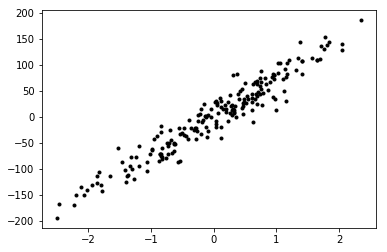

In [5]:
plt.plot(X, y, "k.")

In [6]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2) 

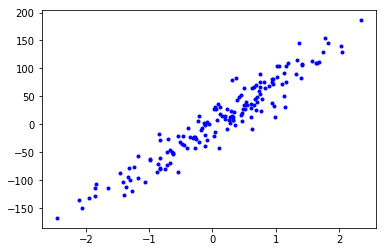

In [7]:
plt.plot(X_train, y_train, "b.")

## 2 线性回归

In [8]:
class Regression(object):
    
    """
        基础线性回归模型，使用输入的X和y进行参数回归
        超参：
        n_iterations:int 训练的步数
        learning_rate:float 学习率
        内部函数:
        initialize_weights:初始化参数
        fit:开始训练
        predict:预测
        内部的数据:
        n_iterations
        learning_rate
        regularization:正则化参数
        regularization.grad:正则化的梯度函数
    """
    
    def __init__(self,n_iterations,learning_rate):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.regularization = lambda x:0
        self.regularization.grad = lambda x:0
    
    def initialize_weights(self,n_features):
        "初始化系数，输入是feature的个数，输出是一个随机初始化好的参数矩阵,[-1/sqrt(N),1/sqrt(N)]"
        limit = 1/math.sqrt(n_features)
        self.w = np.random.uniform(-limit,limit,(n_features,))
    
    def fit(self,X,y):
        # 插入偏置列1到X中
        X = np.insert(X,0,1,axis=1)  # 给每一行的第0列增加一个1
        self.training_errors = []    # 保存每一次步长的训练Loss
        self.initialize_weights(n_features=X.shape[1])   # 初始化参数w
        
        # 进行梯度下降迭代
        for i in range(self.n_iterations):
            y_pred = X.dot(self.w)    # 进行预测
            # 计算Loss
            mse=np.mean(0.5*(y-y_pred)**2+self.regularization(self.w))
            self.training_errors.append(mse)#将Loss加入到training_errors的数组中
            #计算带有正则化项的梯度
            g_w=-(y-y_pred).T.dot(X)/len(X)+self.regularization.grad(self.w)
            #根据梯度下降的算法更新参数
            self.w-=self.learning_rate*g_w
            
    def predict(self,X):
        #通过输入X预测一个样本
        X=np.insert(X,0,1,axis=1)
        pred=X.dot(self.w)
        return pred

In [9]:
model=Regression(n_iterations=1000,learning_rate=0.01)

In [10]:
model.fit(X_train,y_train)

Text(0.5, 0, 'Steps')

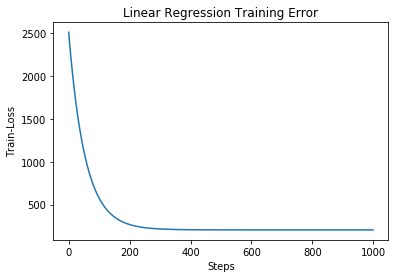

In [11]:
training =plt.plot(range(len(model.training_errors)),model.training_errors,label="Training Error")
plt.title("Linear Regression Training Error")
plt.ylabel("Train-Loss")
plt.xlabel("Steps")

In [12]:
model.w

array([3.57058686e-02, 7.13486046e+01])

## 3 评价模型

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_pred,y_test)

In [16]:
mse

330.04561830267176

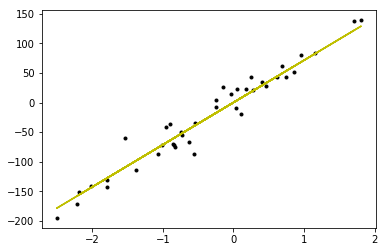

In [17]:
plt.plot(X_test,y_test,'k.')
plt.plot(X_test,y_pred,'Y')

## 4 最小二乘法线性回归

In [18]:
def lsm_function(X,y):
    G=np.mat(np.insert(X,0,1,axis=1))
    return np.squeeze(np.asarray((G.T.dot(G)).I.dot(G.T).dot(y)))

In [19]:
lsm_function(X_train,y_train)

array([2.81830229e-02, 7.13608142e+01])

In [20]:
class LinearRegression(Regression):
    """带有最小二乘法的线性回归
    参数:
    -------------
    n_iterations
    
    learning_rate
    
    gradient_descent:bool 
        决定是否使用梯度下降法，如果是True则使用梯度下降，False使用最小二乘
    """
    def __init__(self,n_iterations=500,learning_rate=0.1,gradient_descent=True):
        self.gradient_descent=gradient_descent
        self.regularization=lambda x:0
        self.regularization.grad=lambda x:0
        super(LinearRegression,self).__init__(n_iterations=n_iterations,learning_rate=learning_rate)
    
    def fit(self,X,y):
        if not self.gradient_descent:
            self.w=lsm_function(X,y)
        else:
            super(LinearRegression,self).fit(X,y)
    
    def predict(self,X):
        return super(LinearRegression,self).predict(X)

In [21]:
model=LinearRegression(n_iterations=1000,learning_rate=0.1,gradient_descent=False)

In [22]:
model.fit(X_train,y_train)

In [23]:
model.w

array([2.81830229e-02, 7.13608142e+01])

In [24]:
def test_and_draw(model):
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    print("方差:",mse)
    plt.plot(X_test,y_test,'k.')
    plt.plot(X_test,y_pred,'Y')

方差: 330.0080135679383


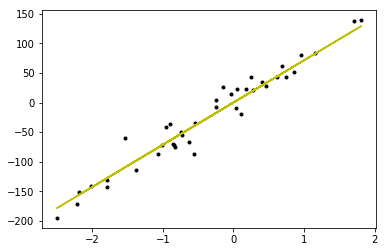

In [25]:
test_and_draw(model)

## 5 正则化回归
### 5.1 L1 正则化

In [26]:
class l1_regularization():
    """L1正则化类/函数
    参数:
    
    alpha--L1正则化系数
    """
    def __init__(self,alpha):
        self.alpha=alpha
    def __call__(self,w):
        return self.alpha*np.linalg.norm(w,ord=1)
    def grad(self,w):
        #w>0->w`=1;w<0->w`=0;w==0->w`=0
        return self.alpha*np.sign(w)

In [27]:
l1=l1_regularization(alpha=0.01)

In [28]:
l1([-3,4])

0.07